# Data Preprocessing and Analysis of the Adult Income Dataset


In [169]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
import joblib

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC



In [171]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [173]:
df = pd.read_csv(r"adult.csv")

In [175]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [177]:
df.shape

(32561, 15)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [181]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

In [183]:
#show data after Replace '?' with NaN
df.sample(6)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
19981,50,Local-gov,163998,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,44,United-States,>50K
27306,63,NaN,170529,Bachelors,13,Married-civ-spouse,NaN,Wife,Black,Female,0,0,45,United-States,<=50K
2409,53,State-gov,50048,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,50,United-States,>50K
10242,24,Private,284317,Bachelors,13,Never-married,Other-service,Own-child,White,Female,0,0,30,United-States,<=50K
19748,36,Private,188834,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
5007,47,Private,341995,Some-college,10,Divorced,Sales,Own-child,White,Male,0,0,55,United-States,<=50K


In [185]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [187]:
# Calculate the percentage of missing values in each column and sort them in descending order
missing_values_percentage = df.isnull().mean() * 100

missing_values_percentage_sorted = missing_values_percentage.sort_values(ascending = False)

missing_values_percentage_sorted

occupation        5.660146
workclass         5.638647
native.country    1.790486
age               0.000000
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
income            0.000000
dtype: float64

In [189]:
# Fill missing values with the mode
for col in ['occupation', 'workclass', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [191]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [193]:
df.duplicated().sum()

24

In [195]:
df.drop_duplicates(inplace=True)

In [197]:
df.duplicated().sum()

0

In [199]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [201]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_columns)

numerical_columns = df.select_dtypes(include=['number']).columns
print("\nNumerical Columns:")
print(numerical_columns)


Categorical Columns:
Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

Numerical Columns:
Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')


In [203]:
result = pd.DataFrame(df['income'].value_counts(normalize=True).reset_index())
result.columns = ['income', 'norm_counts']
result['counts'] = result['norm_counts'] * len(df)
result

,income,norm_counts,counts
0,<=50K,0.759074,24698.0
1,>50K,0.240926,7839.0


In [205]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [207]:
df.sample(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
5265,48,Private,182862,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,1
20858,23,Private,253190,Assoc-acdm,12,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,25,United-States,0
15746,19,Private,99246,11th,7,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,25,United-States,0


# more analysis and visualization

In [210]:
less_50K = df[df['income'] == 0].shape[0]
more_50K = df[df['income'] == 1].shape[0]

print(f"<=50K count: {less_50K}")
print(f">50K count: {more_50K}")

<=50K count: 24698
>50K count: 7839


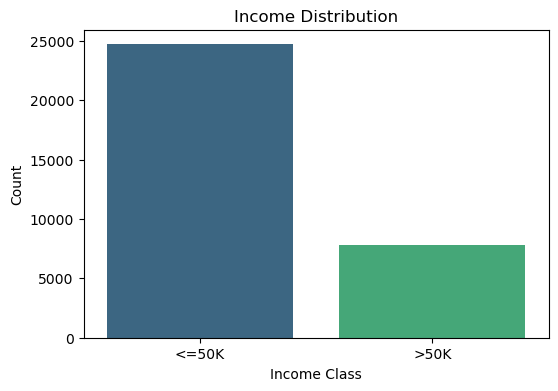

In [212]:
income_counts = [less_50K, more_50K]
income_labels = ['<=50K', '>50K']

plt.figure(figsize=(6, 4))
sns.barplot(x=income_labels, y=income_counts, palette='viridis')

plt.title('Income Distribution')
plt.xlabel('Income Class')
plt.ylabel('Count')

plt.show()


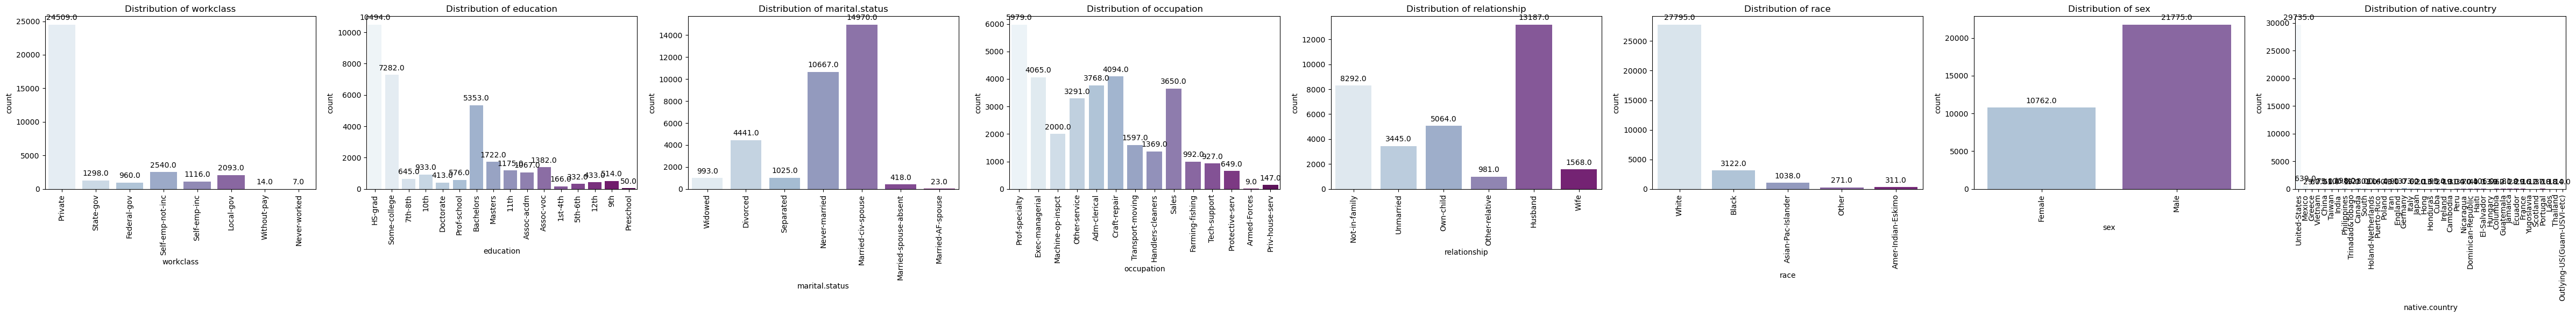

In [214]:
# Visualize the distribution of categorical columns in the dataframe using count plots

categorical_columns = df.select_dtypes(include=['object']).columns

num_cols = len(categorical_columns)
num_rows = 1 

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(6 * num_cols, 6))

if num_cols == 1:
    axes = [axes]

for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df, palette='BuPu', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].tick_params(axis='x', rotation=90)  
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=10, color='black', xytext=(0, 9),
                         textcoords='offset points')

plt.tight_layout()
plt.show()


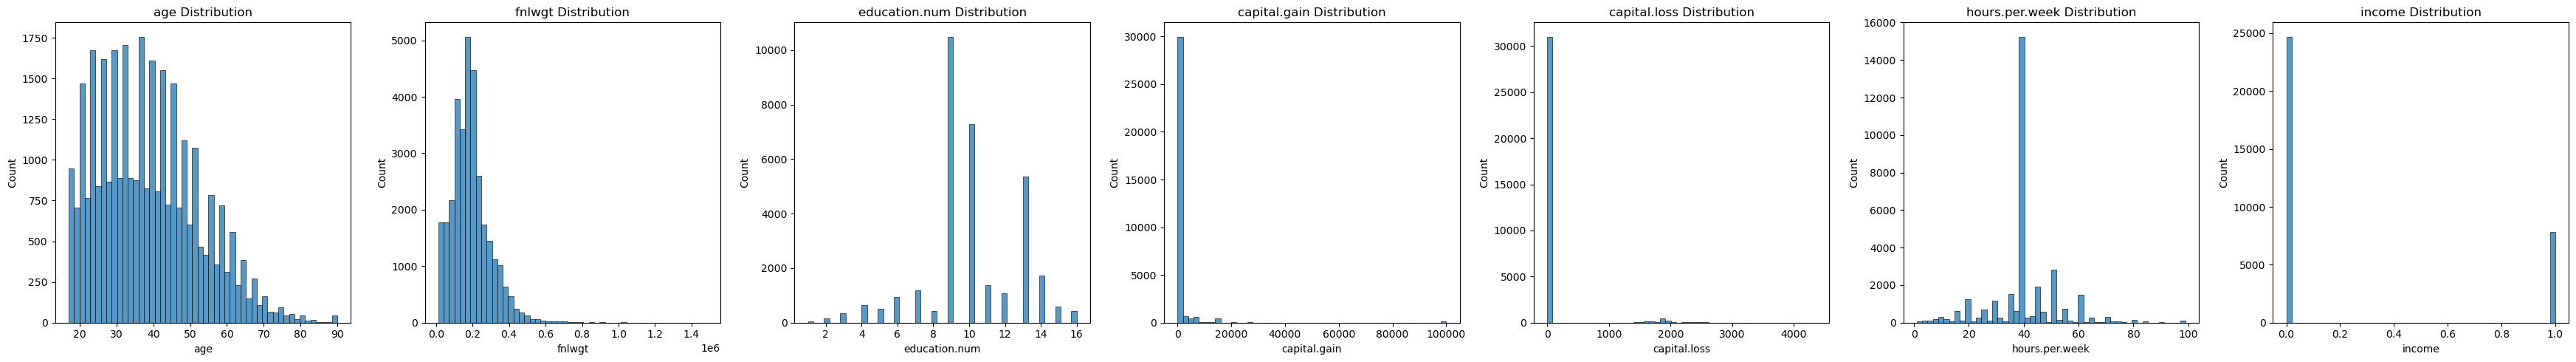

In [215]:
# Visualize the distribution of numeric columns in the dataframe using histograms

numeric_columns = df.select_dtypes(include=['number']).columns

num_cols = len(numeric_columns)
num_rows = 1 

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5 * num_cols, 5))

for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], ax=axes[i], bins=50)
    axes[i].set_title(f'{column} Distribution')

plt.tight_layout()
plt.show()


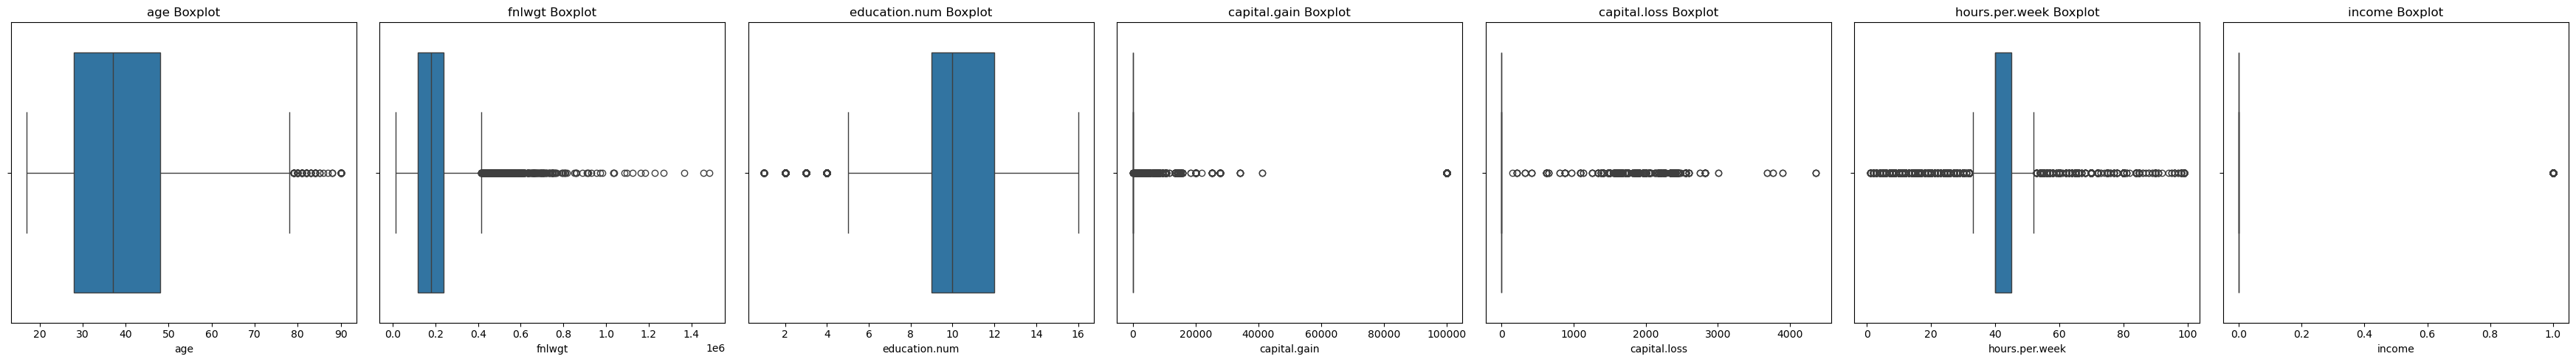

In [216]:
# Visualize the distribution and potential outliers of numeric columns using boxplots

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5 * num_cols, 5))

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'{column} Boxplot')

plt.tight_layout()
plt.show()

# Handling with some columns

# education column

In [222]:
counts = df['education'].value_counts()

norm_counts = df['education'].value_counts(normalize=True)

result = pd.DataFrame({
    'education': counts.index,
    'counts': counts.values,
    'norm_counts': norm_counts.values
})

result


,education,counts,norm_counts
0,HS-grad,10494,0.322525
1,Some-college,7282,0.223807
2,Bachelors,5353,0.164520
3,Masters,1722,0.052924
4,Assoc-voc,1382,0.042475
5,11th,1175,0.036113
6,Assoc-acdm,1067,0.032793
7,10th,933,0.028675
8,7th-8th,645,0.019824
9,Prof-school,576,0.017703


In [224]:
df['education'].replace(['1st-4th', '5th-6th'], 'Primary', inplace=True)
df['education'].replace(['7th-8th', '9th', '10th', '11th', '12th'], 'Middle-School', inplace=True)
df['education'].replace(['HS-grad'], 'High-School', inplace=True)
df['education'].replace(['Some-college', 'Assoc-voc', 'Assoc-acdm'], 'College', inplace=True)
df['education'].replace(['Bachelors'], 'Bachelors', inplace=True)
df['education'].replace(['Prof-school', 'Doctorate'], 'Doctorate', inplace=True)

In [226]:
counts = df['education'].value_counts()

norm_counts = df['education'].value_counts(normalize=True)

result = pd.DataFrame({
    'education': counts.index,
    'counts': counts.values,
    'norm_counts': norm_counts.values
})

result


,education,counts,norm_counts
0,High-School,10494,0.322525
1,College,9731,0.299075
2,Bachelors,5353,0.164520
3,Middle-School,3700,0.113717
4,Masters,1722,0.052924
5,Doctorate,989,0.030396
6,Primary,498,0.015306
7,Preschool,50,0.001537


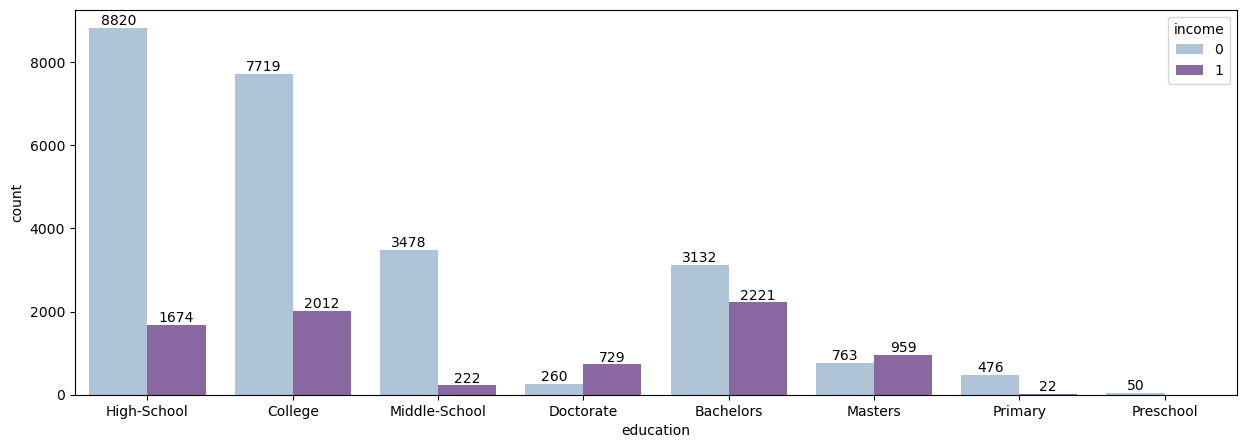

In [228]:
plt.figure(figsize=(15,5))
ax = sns.countplot( data=df, x="education",hue="income", palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

# race column

In [231]:
result = pd.DataFrame(df['race'].value_counts(normalize=True).reset_index())
result.columns = ['race', 'norm_counts']
result['counts'] = result['norm_counts'] * len(df)
result

,race,norm_counts,counts
0,White,0.854258,27795.0
1,Black,0.095952,3122.0
2,Asian-Pac-Islander,0.031902,1038.0
3,Amer-Indian-Eskimo,0.009558,311.0
4,Other,0.008329,271.0


In [233]:
df['race'].replace(['Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Others', inplace = True)

In [235]:
result = pd.DataFrame(df['race'].value_counts(normalize=True).reset_index())
result.columns = ['race', 'norm_counts']
result['counts'] = result['norm_counts'] * len(df)
result


,race,norm_counts,counts
0,White,0.854258,27795.0
1,Black,0.095952,3122.0
2,Others,0.049789,1620.0


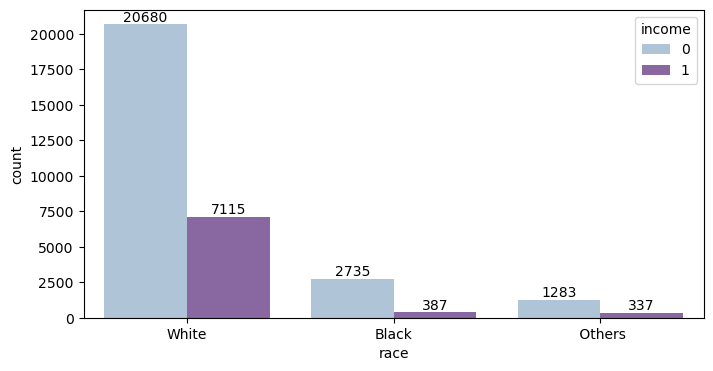

In [237]:
plt.figure(figsize=(8,4))
ax = sns.countplot( data=df, x="race",hue='income', palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

# native.country column

In [239]:
result = pd.DataFrame(df['native.country'].value_counts(normalize=True).reset_index())
result.columns = ['native.country', 'norm_counts']
result['counts'] = result['norm_counts'] * len(df)
result


,native.country,norm_counts,counts
0,United-States,0.913883,29735.0
1,Mexico,0.019639,639.0
2,Philippines,0.006085,198.0
3,Germany,0.004211,137.0
4,Canada,0.003719,121.0
5,Puerto-Rico,0.003504,114.0
6,El-Salvador,0.003258,106.0
7,India,0.003073,100.0
8,Cuba,0.002920,95.0
9,England,0.002766,90.0


In [240]:
# Replaces all values in the native.country column that are not "United-States" with "Others"
df['native.country'].loc[df['native.country'] != 'United-States'] = 'Others'

C:\Users\ayaaa\AppData\Local\Temp\ipykernel_11416\3524280841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['native.country'].loc[df['native.country'] != 'United-States'] = 'Others'


In [241]:
result = pd.DataFrame(df['native.country'].value_counts(normalize=True).reset_index())
result.columns = ['native.country', 'norm_counts']
result['counts'] = result['norm_counts'] * len(df)
result

,native.country,norm_counts,counts
0,United-States,0.913883,29735.0
1,Others,0.086117,2802.0


# capital.gain and capital_diff column

In [243]:
result = pd.DataFrame(df['capital.gain'].value_counts(normalize=True).reset_index())
result.columns = ['capital.gain', 'norm_counts']
result['counts'] = result['norm_counts'] * len(df)
result

,capital.gain,norm_counts,counts
0,0,0.916649,29825.0
1,15024,0.010665,347.0
2,7688,0.008729,284.0
3,7298,0.007561,246.0
4,99999,0.004887,159.0
...,...,...,...
114,1111,0.000031,1.0
115,4931,0.000031,1.0
116,7978,0.000031,1.0
117,5060,0.000031,1.0


In [244]:
result = pd.DataFrame(df['capital.loss'].value_counts(normalize=True).reset_index())
result.columns = ['capital.loss', 'norm_counts']
result['counts'] = result['norm_counts'] * len(df)
result


,capital.loss,norm_counts,counts
0,0,0.953315,31018.0
1,1902,0.006208,202.0
2,1977,0.005163,168.0
3,1887,0.004887,159.0
4,1485,0.001567,51.0
...,...,...,...
87,2201,0.000031,1.0
88,2163,0.000031,1.0
89,1944,0.000031,1.0
90,1539,0.000031,1.0


In [245]:
df['capital_diff'] = df['capital.gain'] - df['capital.loss']
df['capital_diff'] = pd.cut(df['capital_diff'], bins = [-5000, 5000, 100000], labels = ['Low', 'High'])
df['capital_diff'] = df['capital_diff'].astype('object')
df.drop(['capital.gain'], axis = 1, inplace = True)
df.drop(['capital.loss'], axis = 1, inplace = True)

In [246]:
result = pd.DataFrame(df['capital_diff'].value_counts(normalize=True).reset_index())
result.columns = ['capital_diff', 'norm_counts']
result['counts'] = result['norm_counts'] * len(df)
result


,capital_diff,norm_counts,counts
0,Low,0.94935,30889.0
1,High,0.05065,1648.0


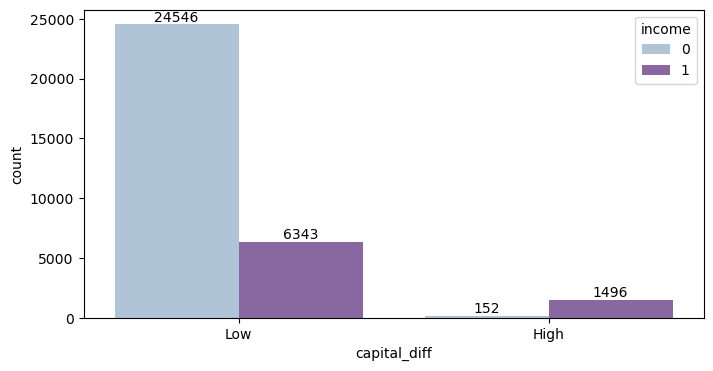

In [247]:
plt.figure(figsize=(8,4))
ax = sns.countplot( data=df, x="capital_diff",hue='income', palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

# hours.per.week column

In [249]:
result = pd.DataFrame(df['hours.per.week'].value_counts(normalize=True).reset_index())
result.columns = ['hours.per.week', 'norm_counts']
result['counts'] = result['norm_counts'] * len(df)
result

,hours.per.week,norm_counts,counts
0,40,0.467283,15204.0
1,50,0.086578,2817.0
2,45,0.056029,1823.0
3,60,0.045333,1475.0
4,35,0.039832,1296.0
...,...,...,...
89,94,0.000031,1.0
90,82,0.000031,1.0
91,92,0.000031,1.0
92,87,0.000031,1.0


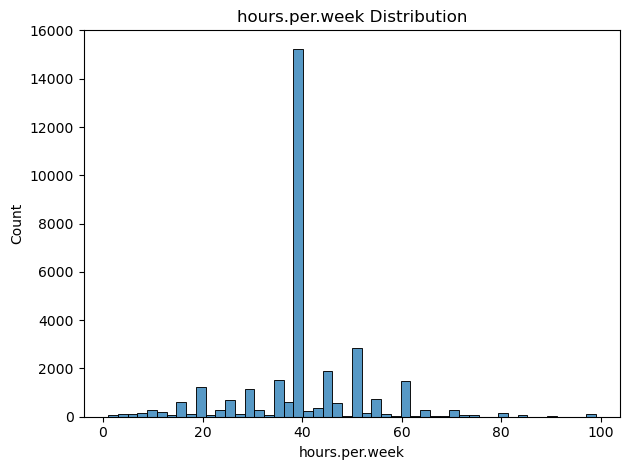

In [250]:
sns.histplot(df['hours.per.week'], bins=50)

plt.title('hours.per.week Distribution')

plt.tight_layout()
plt.show()


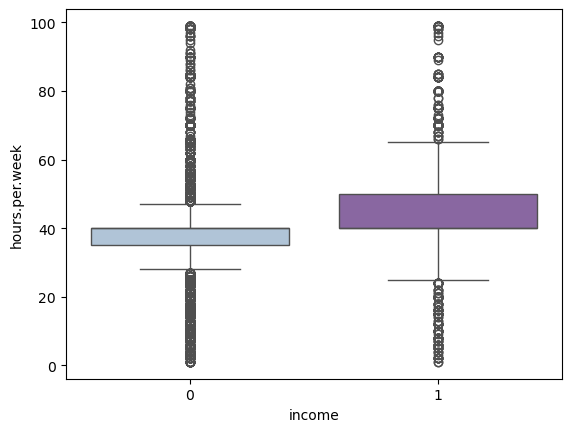

In [251]:
sns.boxplot(data=df,y="hours.per.week",x='income', palette='BuPu');

In [252]:
# Remove the outlier on the column
df = df[~((df["hours.per.week"] > 72) | (df["hours.per.week"] < 20))]

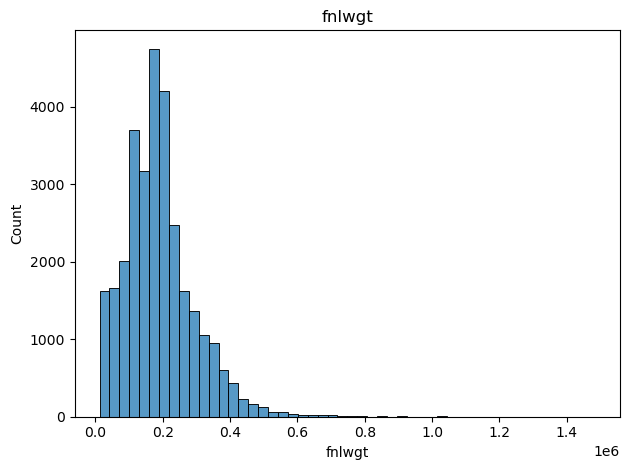

In [253]:
sns.histplot(df['fnlwgt'], bins=50)

plt.title('fnlwgt')

plt.tight_layout()
plt.show()

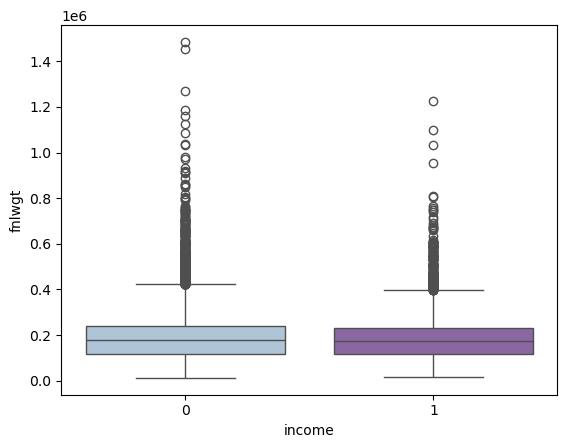

In [254]:
sns.boxplot(data=df,y="fnlwgt",x='income', palette='BuPu');

In [255]:
# Drop the 'fnlwgt' column as it is a weight field used for census data adjustment 
# and doesn't provide useful information for the income prediction task
df.drop(['fnlwgt'], axis = 1, inplace = True)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30410 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30410 non-null  int64 
 1   workclass       30410 non-null  object
 2   education       30410 non-null  object
 3   education.num   30410 non-null  int64 
 4   marital.status  30410 non-null  object
 5   occupation      30410 non-null  object
 6   relationship    30410 non-null  object
 7   race            30410 non-null  object
 8   sex             30410 non-null  object
 9   hours.per.week  30410 non-null  int64 
 10  native.country  30410 non-null  object
 11  income          30410 non-null  int64 
 12  capital_diff    30410 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [257]:
df.sample(5)

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income,capital_diff
21575,53,Private,High-School,9,Separated,Transport-moving,Unmarried,White,Male,45,United-States,0,Low
23779,28,Private,High-School,9,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,0,Low
8401,51,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Black,Male,35,United-States,0,Low
12958,27,Private,High-School,9,Never-married,Handlers-cleaners,Other-relative,Others,Male,40,United-States,0,Low
30970,36,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,50,United-States,0,Low


# Model Training for Income Prediction

In [259]:
X= df.drop(columns="income")
y= df.income

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42 )

In [261]:
# Apply OneHotEncoder to onehot_categorics and OrdinalEncoder to ordinal_categorics, keeping other columns unchanged
onehot_categorics = ["workclass", "marital.status", "occupation", "relationship", "race", "sex", "native.country"]
ordinal_categorics = ["education", "capital_diff"]

column_transformed = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown="ignore", sparse_output=False), onehot_categorics),
        ('ordinal', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), ordinal_categorics)
    ],
    remainder='passthrough'  
)


In [262]:
# Apply column transformations to training and test sets
X_train_trans = column_transformed.fit_transform(X_train) 
X_test_trans = column_transformed.transform(X_test)

In [263]:
# Handle class imbalance using oversampling and undersampling
ros = RandomOverSampler(sampling_strategy=0.5, random_state=42)
rus = RandomUnderSampler(sampling_strategy=0.7, random_state=42)

In [264]:
# Resample the training data by first oversampling and then undersampling to balance the classes
X_resampled, y_resampled = ros.fit_resample(X_train_trans, y_train)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

In [265]:
# Display balanced class distribution and percentage
income_counts_resampled = pd.Series(y_resampled).value_counts()
income_percentage_resampled = (income_counts_resampled / len(y_resampled)) * 100
print("\nBalanced Counts Class Distribution:")
print(income_counts_resampled)
print("\nBalanced Bercentage Class Percentage:")
print(income_percentage_resampled)


Balanced Counts Class Distribution:
income
0    13047
1     9133
Name: count, dtype: int64

Balanced Bercentage Class Percentage:
income
0    58.823264
1    41.176736
Name: count, dtype: float64


In [266]:
X_train_trans.shape, X_test_trans.shape

((24328, 47), (6082, 47))

In [267]:
#Get the feature names after applying the transformations
features = column_transformed.get_feature_names_out()
features

array(['onehot__workclass_Federal-gov', 'onehot__workclass_Local-gov',
       'onehot__workclass_Never-worked', 'onehot__workclass_Private',
       'onehot__workclass_Self-emp-inc',
       'onehot__workclass_Self-emp-not-inc',
       'onehot__workclass_State-gov', 'onehot__workclass_Without-pay',
       'onehot__marital.status_Divorced',
       'onehot__marital.status_Married-AF-spouse',
       'onehot__marital.status_Married-civ-spouse',
       'onehot__marital.status_Married-spouse-absent',
       'onehot__marital.status_Never-married',
       'onehot__marital.status_Separated',
       'onehot__marital.status_Widowed',
       'onehot__occupation_Adm-clerical',
       'onehot__occupation_Armed-Forces',
       'onehot__occupation_Craft-repair',
       'onehot__occupation_Exec-managerial',
       'onehot__occupation_Farming-fishing',
       'onehot__occupation_Handlers-cleaners',
       'onehot__occupation_Machine-op-inspct',
       'onehot__occupation_Other-service',
       'onehot__oc

In [268]:
X_train= pd.DataFrame(X_train_trans, columns=features, index=X_train.index)
X_train.head()

,onehot__workclass_Federal-gov,onehot__workclass_Local-gov,onehot__workclass_Never-worked,onehot__workclass_Private,onehot__workclass_Self-emp-inc,onehot__workclass_Self-emp-not-inc,onehot__workclass_State-gov,onehot__workclass_Without-pay,onehot__marital.status_Divorced,onehot__marital.status_Married-AF-spouse,...,onehot__race_White,onehot__sex_Female,onehot__sex_Male,onehot__native.country_Others,onehot__native.country_United-States,ordinal__education,ordinal__capital_diff,remainder__age,remainder__education.num,remainder__hours.per.week
5817,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,3.0,1.0,21.0,9.0,40.0
1997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,2.0,0.0,40.0,15.0,40.0
6631,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,30.0,10.0,50.0
15160,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,3.0,1.0,25.0,9.0,35.0
3668,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,3.0,1.0,33.0,9.0,40.0


In [269]:
X_test= pd.DataFrame(X_test_trans, columns=features, index=X_test.index)
X_test.head()

,onehot__workclass_Federal-gov,onehot__workclass_Local-gov,onehot__workclass_Never-worked,onehot__workclass_Private,onehot__workclass_Self-emp-inc,onehot__workclass_Self-emp-not-inc,onehot__workclass_State-gov,onehot__workclass_Without-pay,onehot__marital.status_Divorced,onehot__marital.status_Married-AF-spouse,...,onehot__race_White,onehot__sex_Female,onehot__sex_Male,onehot__native.country_Others,onehot__native.country_United-States,ordinal__education,ordinal__capital_diff,remainder__age,remainder__education.num,remainder__hours.per.week
14126,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,39.0,10.0,40.0
30123,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,48.0,10.0,50.0
9691,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,5.0,1.0,53.0,6.0,40.0
11926,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,34.0,10.0,40.0
32146,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,3.0,1.0,21.0,9.0,24.0


In [270]:
# Calculate the correlation of features with the 'income' column in the training data and sort them, excluding the 'income' column itself.
corr_by_income = X_train.join(y_train).corr()["income"].sort_values()[:-1]
corr_by_income

ordinal__capital_diff                          -0.355451
onehot__marital.status_Never-married           -0.315363
onehot__relationship_Own-child                 -0.221385
onehot__sex_Female                             -0.211727
onehot__relationship_Not-in-family             -0.193808
ordinal__education                             -0.162381
onehot__occupation_Other-service               -0.151548
onehot__relationship_Unmarried                 -0.149758
onehot__marital.status_Divorced                -0.136841
onehot__workclass_Private                      -0.129812
onehot__occupation_Adm-clerical                -0.096142
onehot__race_Black                             -0.093051
onehot__occupation_Handlers-cleaners           -0.092886
onehot__relationship_Other-relative            -0.085129
onehot__marital.status_Separated               -0.077488
onehot__occupation_Machine-op-inspct           -0.073392
onehot__marital.status_Widowed                 -0.056202
onehot__occupation_Farming-fish

# Create and train SVC model in a pipeline with MinMaxScaler


In [285]:
svm_model = Pipeline([("scaler", MinMaxScaler()),
                      ("SVC", SVC(probability=True))])

#Fit the model
svm_model.fit(X_train, y_train)

# Prediction
y_pred=svm_model.predict(X_test)

In [286]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4567
           1       0.71      0.60      0.65      1515

    accuracy                           0.84      6082
   macro avg       0.79      0.76      0.77      6082
weighted avg       0.83      0.84      0.83      6082

[[4204  363]
 [ 611  904]]
